Implementing Logistic Regression Functions

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [6]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]

In [7]:
y=data.diagnosis.values
x=data.iloc[:,1:]

In [8]:
#normalize x
x=(x-np.min(x))/(np.max(x)-np.min(x))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [10]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [11]:
def initial(dimension):
    w= np.full([dimension,1],0.01)
    b=0
    return w,b
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head
    

In [12]:
def ForwardBackward(w,b,x_train,y_train):
    z= np.dot(w.T,x_train)+b
    y_head = sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

In [13]:
def Update(w,b,x_train,y_train,learning,itnumber):
    index=[]
    cost_list=[]
    for i in range(itnumber):
        cost,gradients=ForwardBackward(w,b,x_train,y_train)
        w=w-learning*gradients["derivative_weight"]
        b=b-learning*gradients["derivative_bias"]
        if(i%10==0):
            cost_list.append(cost)
            index.append(i)
            print("updated cost is {}".format(cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, cost_list

In [14]:
def Predict(w,b,x_test):
    z=np.dot(w.T,x_test)+b
    z_=sigmoid(z)
    y_predict=np.zeros((1,x_test.shape[1]))
    for i in range(z_.shape[1]):
        if z[0,i]<=0.5:
            y_predict[0,i]=0
        else:
            y_predict[0,i]=1
    return y_predict


    

In [15]:
def LogReg(x_train,y_train,x_test,y_test,learning,itnumber):
    dim=x_train.shape[0]
    w,b = initial(dim)
    parameters,cost_list=Update(w,b,x_train,y_train,learning,itnumber)
    y_predict=Predict(parameters["weight"],parameters["bias"],x_test)
    print("Accuracy: {} %".format(100 - np.mean(np.abs(y_predict - y_test)) * 100))

updated cost is 0.6929770904921355
updated cost is 0.4996673115485451
updated cost is 0.40661631311808083


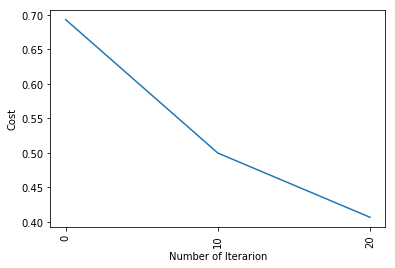

Accuracy: 85.96491228070175 %


In [16]:
import matplotlib.pyplot as plt
LogReg(x_train,y_train,x_test,y_test,learning=1,itnumber=30)

updated cost is 0.6929770904921355
updated cost is 0.42728462053837263
updated cost is 0.3345854160878721
updated cost is 0.28675554382462715
updated cost is 0.2569429008529365
updated cost is 0.23621008768537857
updated cost is 0.2207331871859169
updated cost is 0.20859699422587905
updated cost is 0.19873255122572012
updated cost is 0.1904939247452523
updated cost is 0.18346628811806404
updated cost is 0.1773700478759272
updated cost is 0.17200920249900908
updated cost is 0.16724179293736757
updated cost is 0.1629621326045668
updated cost is 0.15908966666109256
updated cost is 0.15556173542416077
updated cost is 0.15232872785829404
updated cost is 0.14935074811349244
updated cost is 0.1465952683568056
updated cost is 0.14403544133754828
updated cost is 0.14164886448793712
updated cost is 0.1394166594720797
updated cost is 0.13732277622155814
updated cost is 0.13535345942104104
updated cost is 0.13349683435512408
updated cost is 0.13174258168645978
updated cost is 0.13008167934579157
u

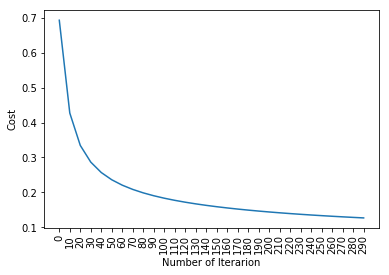

Accuracy: 96.49122807017544 %


In [17]:
LogReg(x_train,y_train,x_test,y_test,learning=1.7,itnumber=300)